In [1]:
print("Binal Manoj Bariya (20MAI0075)")
print("Github Link :https://github.com/binalbariya/Deep-Learning")


Binal Manoj Bariya (20MAI0075)
Github Link :https://github.com/binalbariya/Deep-Learning


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from random import random

dataset = pd.DataFrame([[1.0,2.0,3.0,0],[2.0,5.0,2.0,0],[3.0,4.0,2.0,0],[1.0,2.0,4.0,0],[4.0,5.0,6.0,1],[7.0,8.0,9.0,1],[6.0,7.0,8.0,1],[3.0,4.0,8.0,1]])
varnames = ["Col"+ str(i) for i in range(3)]
print(varnames)
varnames.append("target")
dataset.columns= varnames
dataset

['Col0', 'Col1', 'Col2']


,Col0,Col1,Col2,target
0,1.0,2.0,3.0,0
1,2.0,5.0,2.0,0
2,3.0,4.0,2.0,0
3,1.0,2.0,4.0,0
4,4.0,5.0,6.0,1
5,7.0,8.0,9.0,1
6,6.0,7.0,8.0,1
7,3.0,4.0,8.0,1


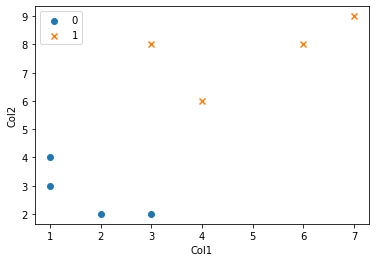

In [6]:
plt.scatter(np.array(dataset.iloc[0:4,0]), np.array(dataset.iloc[:4,2]), marker='o', label='0')
plt.scatter(np.array(dataset.iloc[4:,0]), np.array(dataset.iloc[4:,2]), marker='x', label='1')
plt.xlabel('Col1')
plt.ylabel('Col2')
plt.legend()
plt.show()

In [7]:
dataset.dtypes

Col0      float64
Col1      float64
Col2      float64
target      int64
dtype: object

In [8]:

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [9]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [10]:

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

In [11]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs


In [22]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)


In [23]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [24]:

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']


In [25]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))



In [29]:
dataset = [[1.0,2.0,3.0,0],[2.0,5.0,2.0,0],[3.0,4.0,2.0,0],[1.0,2.0,4.0,0],[4.0,5.0,6.0,1],[7.0,8.0,9.0,1],[6.0,7.0,8.0,1],[3.0,4.0,8.0,1]]


n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.041
>epoch=1, lrate=0.500, error=5.319
>epoch=2, lrate=0.500, error=4.705
>epoch=3, lrate=0.500, error=4.428
>epoch=4, lrate=0.500, error=4.357
>epoch=5, lrate=0.500, error=4.345
>epoch=6, lrate=0.500, error=4.345
>epoch=7, lrate=0.500, error=4.347
>epoch=8, lrate=0.500, error=4.348
>epoch=9, lrate=0.500, error=4.349
>epoch=10, lrate=0.500, error=4.349
>epoch=11, lrate=0.500, error=4.349
>epoch=12, lrate=0.500, error=4.350
>epoch=13, lrate=0.500, error=4.350
>epoch=14, lrate=0.500, error=4.350
>epoch=15, lrate=0.500, error=4.350
>epoch=16, lrate=0.500, error=4.350
>epoch=17, lrate=0.500, error=4.350
>epoch=18, lrate=0.500, error=4.350
>epoch=19, lrate=0.500, error=4.350
[{'weights': [0.9685497076228938, 0.6301726109750012, 0.941223126923701, 0.3395111931489441], 'output': 0.9999983181814939, 'delta': 5.669441999297473e-08}, {'weights': [0.6455675866675986, 0.9005446105796303, 0.6801820570984476, 0.7478155847006273], 'output': 0.9999919364385803, 'delta': 

In [30]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [35]:
dataset = [[1.0,2.0,3.0,0],
           [5.0,3.0,7,0,1],
           [6.0,1.0,9.0,0]]

network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=1
